In [1]:
import numpy as np
from sklearn.datasets import make_regression

X, y = make_regression(
    n_samples = 500, n_features = 2,
    n_informative = 2, noise = 5,
    random_state = 0
)

print(X.shape)
print(y.shape)

(500, 2)
(500,)


In [2]:
print("output range = [%f %f]" %(min(y), max(y)))

output range = [-288.225754 271.270135]


In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation

2024-04-17 11:42:33.188815: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-17 11:42:33.189072: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-17 11:42:33.192713: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-17 11:42:33.223470: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-17 11:42:33.797224: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [4]:
def model_build():
    model = Sequential()

    model.add(Dense(16, input_dim=2, activation="relu"))
    model.add(Dense(8, activation="relu"))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')

    return model

In [5]:
!pip3 install scikeras

In [6]:
!pip freeze

absl-py==2.1.0
aiobotocore @ file:///croot/aiobotocore_1701291493089/work
aiohttp @ file:///croot/aiohttp_1707342283163/work
aioitertools @ file:///tmp/build/80754af9/aioitertools_1607109665762/work
aiosignal @ file:///tmp/build/80754af9/aiosignal_1637843061372/work
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
altair @ file:///croot/altair_1687526041770/work
anaconda-anon-usage @ file:///croot/anaconda-anon-usage_1697038922993/work
anaconda-catalogs @ file:///croot/anaconda-catalogs_1685727283692/work
anaconda-client @ file:///croot/anaconda-client_1708640631824/work
anaconda-cloud-auth @ file:///croot/anaconda-cloud-auth_1697462711326/work
anaconda-navigator @ file:///croot/anaconda-navigator_1704813276856/work
anaconda-project @ file:///work/ci_py311/anaconda-project_1676846728333/work
anyio @ file:///croot/anyio_1706220167567/work
appdirs==1.4.4
archspec @ file:///croot/archspec_1697725767277/work
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_164500021

In [7]:
from scikeras.wrappers import KerasRegressor

In [8]:
YourModel = KerasRegressor(
    build_fn = model_build,
    epochs = 400,
    batch_size = 10,
    verbose = 1
)

In [9]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5)

In [10]:
from sklearn.model_selection import cross_val_score
results = cross_val_score(YourModel, X, y, cv=kf)

Epoch 1/400


/home/eddi/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/eddi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-04-17 11:42:36.772826: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-17 11:42:36.773285: W tensorflow/core/common_runtime/gpu/gpu_device.

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - loss: 10600.7178 
Epoch 2/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - loss: 11549.3379
Epoch 3/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - loss: 11735.6318
Epoch 4/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 10439.1133
Epoch 5/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 10603.0586
Epoch 6/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - loss: 10044.4355
Epoch 7/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - loss: 9836.7324
Epoch 8/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - loss: 9912.4258
Epoch 9/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - loss: 9759.0820
Epoch 10/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - loss: 8598.3945
Epoch 11/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - loss: 7553.6943
Epoch 12/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - loss: 7489.7856
Epoch 13/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - loss: 5481.2729
Epoch 14/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - loss: 6087.0776
Epoch 

/home/eddi/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/eddi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - loss: 10717.1104
Epoch 2/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - loss: 9896.4092
Epoch 3/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 10903.4355
Epoch 4/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - loss: 11057.5625
Epoch 5/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - loss: 10643.1562
Epoch 6/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - loss: 10515.9766
Epoch 7/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - loss: 10585.3965
Epoch 8/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 9077.9697
Epoch 9/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 8868.2559
Epoch 10/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - loss: 9632.2275
Epoch 11/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - loss: 8036.3535
Epoch 12/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - loss: 7790.1650
Epoch 13/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 6307.4160
Epoch 14/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 6193.3530
Epoch 1

/home/eddi/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/eddi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 410us/step - loss: 10950.1191
Epoch 2/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - loss: 10656.1943
Epoch 3/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 9776.2139
Epoch 4/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 10303.4746
Epoch 5/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - loss: 11869.6689
Epoch 6/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 9927.9180
Epoch 7/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - loss: 9565.7852
Epoch 8/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - loss: 10017.9521
Epoch 9/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 8896.4600
Epoch 10/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 8435.0586
Epoch 11/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - loss: 6816.8281
Epoch 12/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - loss: 6638.0933
Epoch 13/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 4761.4585
Epoch 14/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - loss: 4660.2231
Epoch 15

/home/eddi/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/eddi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 11129.5781
Epoch 2/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - loss: 11282.7354
Epoch 3/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - loss: 11673.7598
Epoch 4/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - loss: 11422.1895
Epoch 5/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - loss: 10451.5742
Epoch 6/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - loss: 10905.0625
Epoch 7/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 10317.6133
Epoch 8/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: 9992.3428
Epoch 9/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - loss: 8660.0039
Epoch 10/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - loss: 7845.4795
Epoch 11/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - loss: 7349.5752
Epoch 12/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - loss: 7101.8081
Epoch 13/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - loss: 5829.8467
Epoch 14/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - loss: 4607.9355
Epoch 

/home/eddi/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/eddi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - loss: 11085.6924
Epoch 2/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - loss: 11939.3711
Epoch 3/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - loss: 11277.4316
Epoch 4/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - loss: 9941.7783
Epoch 5/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - loss: 11209.2324
Epoch 6/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - loss: 10652.9512
Epoch 7/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - loss: 10710.7168
Epoch 8/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 9810.5801
Epoch 9/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - loss: 10388.8027
Epoch 10/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - loss: 9008.6621
Epoch 11/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 8876.3906
Epoch 12/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - loss: 7701.5840
Epoch 13/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - loss: 7153.9336
Epoch 14/400
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - loss: 6773.5859
Epoch 

In [11]:
print("Final Cross Validation Loss:", abs(results.mean()))

Final Cross Validation Loss: 0.9976895763238522


In [ ]:
# 0.99 의 의미는 0.0099%로 99.9901 로 10000 개 중 1개 틀림을 의미함

In [12]:
import matplotlib.pyplot as plt
import matplotlib

import numpy as np

In [13]:
import matplotlib.patches as mpatches
from sklearn.datasets import make_blobs, make_circles

In [14]:
def plot_data(pl, X, y):
    # y가 0인 녀석 중 x 좌표
    # 'ob' 는 o 표시 blue
    pl.plot(X[y == 0, 0], X[y == 0, 1], 'ob', alpha = 0.5)
    # y가 1인 녀석 중 y 좌표
    # 'xr' 은 x 표시 red
    pl.plot(X[y == 1, 0], X[y == 1, 1], 'xr', alpha = 0.5)
    pl.legend(['0', '1'])
    return pl

In [15]:
X, y = make_circles(
    n_samples = 400,
    factor = 0.6,
    noise = 0.1,
    random_state = 42
)

print(y)

[1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0
 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0
 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0
 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0
 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1
 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1
 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0
 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0]


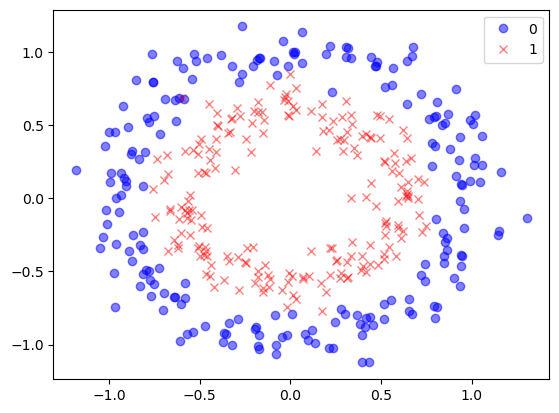

In [16]:
pl = plot_data(plt, X, y)
pl.show()

In [17]:
seed = 1
print("X size =", X.shape)
print("y size =", y.shape)
print("Num of Samples =", X.shape[0])

X size = (400, 2)
y size = (400,)
Num of Samples = 400


In [18]:
print(X)

[[ 5.22047667e-01  2.45076964e-01]
 [-4.90174568e-01  4.04540597e-01]
 [ 4.69901235e-01  9.04544287e-01]
 [ 7.37010889e-01  1.11486553e-01]
 [-9.86636209e-01  1.69521513e-01]
 [-7.17008501e-01  4.38359514e-01]
 [-4.41013452e-01 -5.31920699e-01]
 [-9.95858989e-01  1.08030813e-01]
 [-3.25897203e-01  5.41504194e-01]
 [-6.96094447e-01 -6.45797770e-01]
 [ 9.28358178e-01  2.58529455e-01]
 [ 2.30348927e-01 -3.40047801e-01]
 [-2.66141506e-01  1.17464969e+00]
 [-7.55781307e-01  7.93410286e-01]
 [-5.69765424e-01 -9.25855019e-01]
 [ 3.18599125e-01  1.02857282e+00]
 [-5.10432759e-01  1.73074993e-01]
 [ 3.95376430e-01 -3.96807852e-01]
 [ 3.37431388e-01  5.71841873e-01]
 [ 7.27958177e-01 -2.31006816e-01]
 [-6.93334233e-01  6.76130038e-01]
 [ 1.00825010e+00  5.07130501e-01]
 [ 6.51086779e-01  1.35010193e-02]
 [-3.45045802e-01  4.46996781e-01]
 [ 1.04462893e+00  1.13624232e-01]
 [ 6.45411496e-01  3.08639177e-02]
 [-9.71724535e-01 -5.12587714e-01]
 [ 3.69760307e-01  2.97525839e-01]
 [-2.09844774e-01  5

In [19]:
from keras.layers import Dense, Activation
from keras.models import Sequential

np.random.seed(seed)

model = Sequential()

In [20]:
model.add(Dense(1, activation='sigmoid', input_dim=2))
model.compile(optimizer='sgd', loss='binary_crossentropy')

/home/eddi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.fit(X, y, batch_size=5, epochs=100, verbose=1)

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 0.7682
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - loss: 0.7420
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step - loss: 0.7463
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 0.7221
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step - loss: 0.7413
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - loss: 0.7372
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - loss: 0.7335
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step - loss: 0.7265
Epoch 9/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - loss: 0.7141
Epoch 10/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step - loss: 0.7230
Epoch 11/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - loss: 0.7083
Epoch 12/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - loss: 0.7259
Epoch 13/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - loss: 0.7108
Epoch 14/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 212us/step - loss: 0.6992
Epoch 15/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [22]:
matplotlib.rcParams['figure.figsize'] = (6.0, 4.0)

In [23]:
def plot_decision_bound(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1

    # linspace()를 통해 첫 번째 두 번째 사이의 값을 세 번째만큼 균일하게 나눔
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)

    # meshgrid()는 x 벡터, y 벡터를 입력 받아 사각형 영역을 구성함
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]

    c = model.predict(ab)
    Z = c.reshape(aa.shape)

    plt.contourf(aa, bb, Z, cmap='bwr', alpha=0.2)
    plot_data(plt, X, y)
    return plt

319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step


Text(0.5, 1.0, 'Logistic Regression')

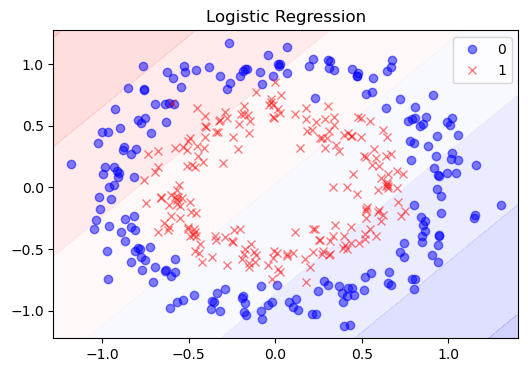

In [24]:
plot_decision_bound(model, X, y)
plt.title("Logistic Regression")

In [25]:
from keras.layers import Dense, Activation
from keras.models import Sequential

np.random.seed(seed)

model = Sequential()

model.add(Dense(3, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='sgd', loss='binary_crossentropy')
model.fit(X, y, batch_size=5, epochs=200, verbose=1)

Epoch 1/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 0.6661
Epoch 2/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - loss: 0.6821
Epoch 3/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - loss: 0.6790
Epoch 4/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - loss: 0.6674
Epoch 5/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - loss: 0.6767
Epoch 6/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - loss: 0.6689
Epoch 7/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - loss: 0.6665
Epoch 8/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - loss: 0.6683
Epoch 9/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - loss: 0.6590
Epoch 10/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - loss: 0.6628
Epoch 11/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - loss: 0.6632
Epoch 12/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - loss: 0.6668
Epoch 13/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - loss: 0.6677
Epoch 14/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - loss: 0.6622
Epoch 15/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 

319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step


Text(0.5, 1.0, 'Hidden Layer 3(tanh)')

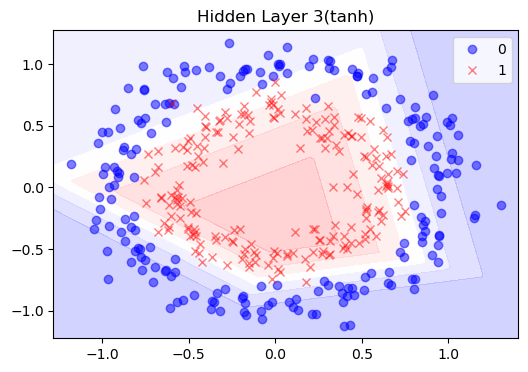

In [26]:
plot_decision_bound(model, X, y)
plt.title("Hidden Layer 3(tanh)")

In [27]:
from keras.layers import Dense, Activation
from keras.models import Sequential

np.random.seed(seed)

model = Sequential()

# 전체 샘플 개수
model.add(Dense(400, activation='relu', input_dim=2))
# 400에 가장 근접한 2^n
model.add(Dense(256, activation='relu'))
model.add(Dense(192, activation='relu'))
# 원에 해당하므로 tanh
model.add(Dense(256, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(96, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='sgd', loss='binary_crossentropy')
model.fit(X, y, batch_size=5, epochs=600, verbose=1)

Epoch 1/600
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - loss: 0.6969
Epoch 2/600
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6747
Epoch 3/600
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - loss: 0.6310
Epoch 4/600
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 0.5328
Epoch 5/600
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - loss: 0.3182
Epoch 6/600
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2203
Epoch 7/600
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - loss: 0.1478
Epoch 8/600
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 0.2413
Epoch 9/600
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - loss: 0.3139
Epoch 10/600
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1743  
Epoch 11/600
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1332
Epoch 12/600
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 0.1651
Epoch 13/600
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 0.1257
Epoch 14/600
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - loss: 0.0978
Epoch 15/600
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Text(0.5, 1.0, 'Add Many Hidden Layer with tanh')

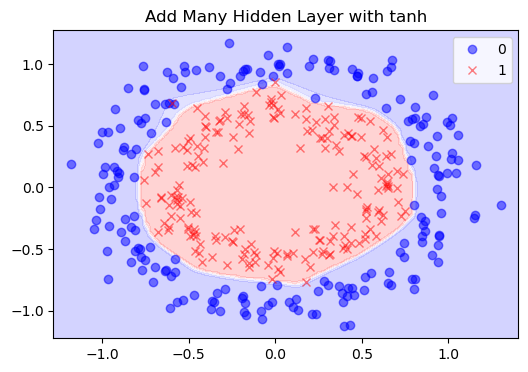

In [28]:
plot_decision_bound(model, X, y)
plt.title("Add Many Hidden Layer with tanh")